**HOMEWORK 2- QUESTION 2 (INDIVIDUAL)** - SATYA SAI SREENIJA EARANKI <searanki@iu.edu>

# 1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Employee.csv')

In [113]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [114]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [116]:
df.shape

(4653, 9)

In [117]:
df.select_dtypes(exclude=['object']).columns.tolist()

['JoiningYear',
 'PaymentTier',
 'Age',
 'ExperienceInCurrentDomain',
 'LeaveOrNot']

In [118]:
df.select_dtypes(include=['object']).columns.tolist()

['Education', 'City', 'Gender', 'EverBenched']

In [119]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [120]:
df.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


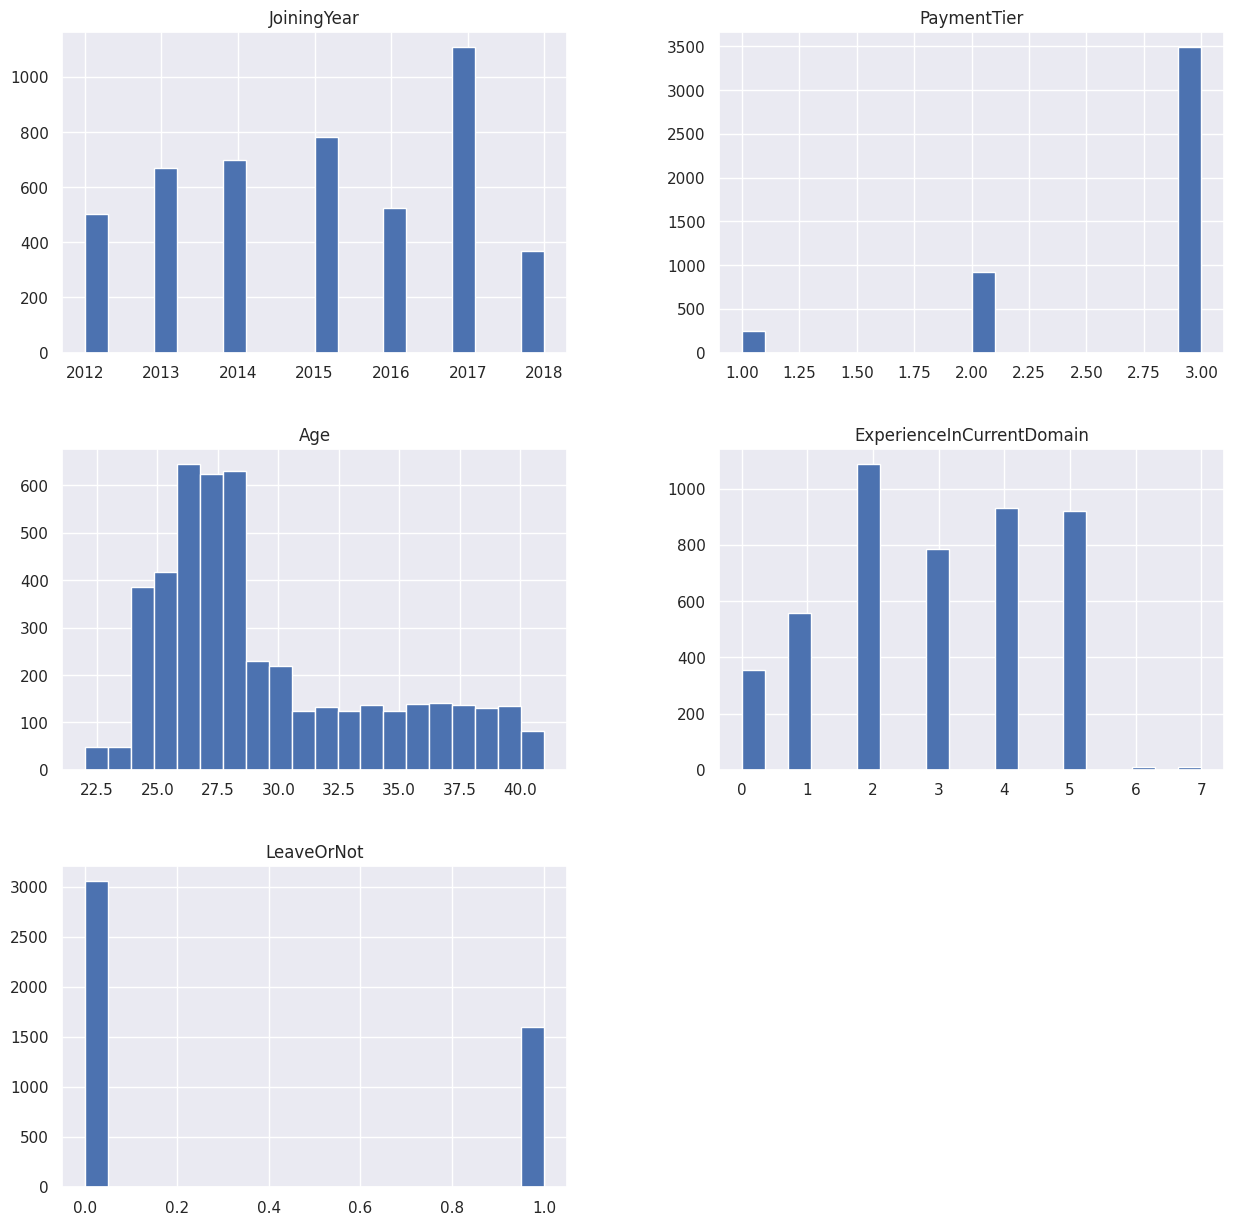

In [121]:
df.hist(bins=20, figsize=(15,15))
plt.show()

In [122]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [123]:
corr_matrix = df.corr()
corr_matrix['LeaveOrNot'].sort_values(ascending=False)

LeaveOrNot                   1.000000
JoiningYear                  0.181705
ExperienceInCurrentDomain   -0.030504
Age                         -0.051126
PaymentTier                 -0.197638
Name: LeaveOrNot, dtype: float64

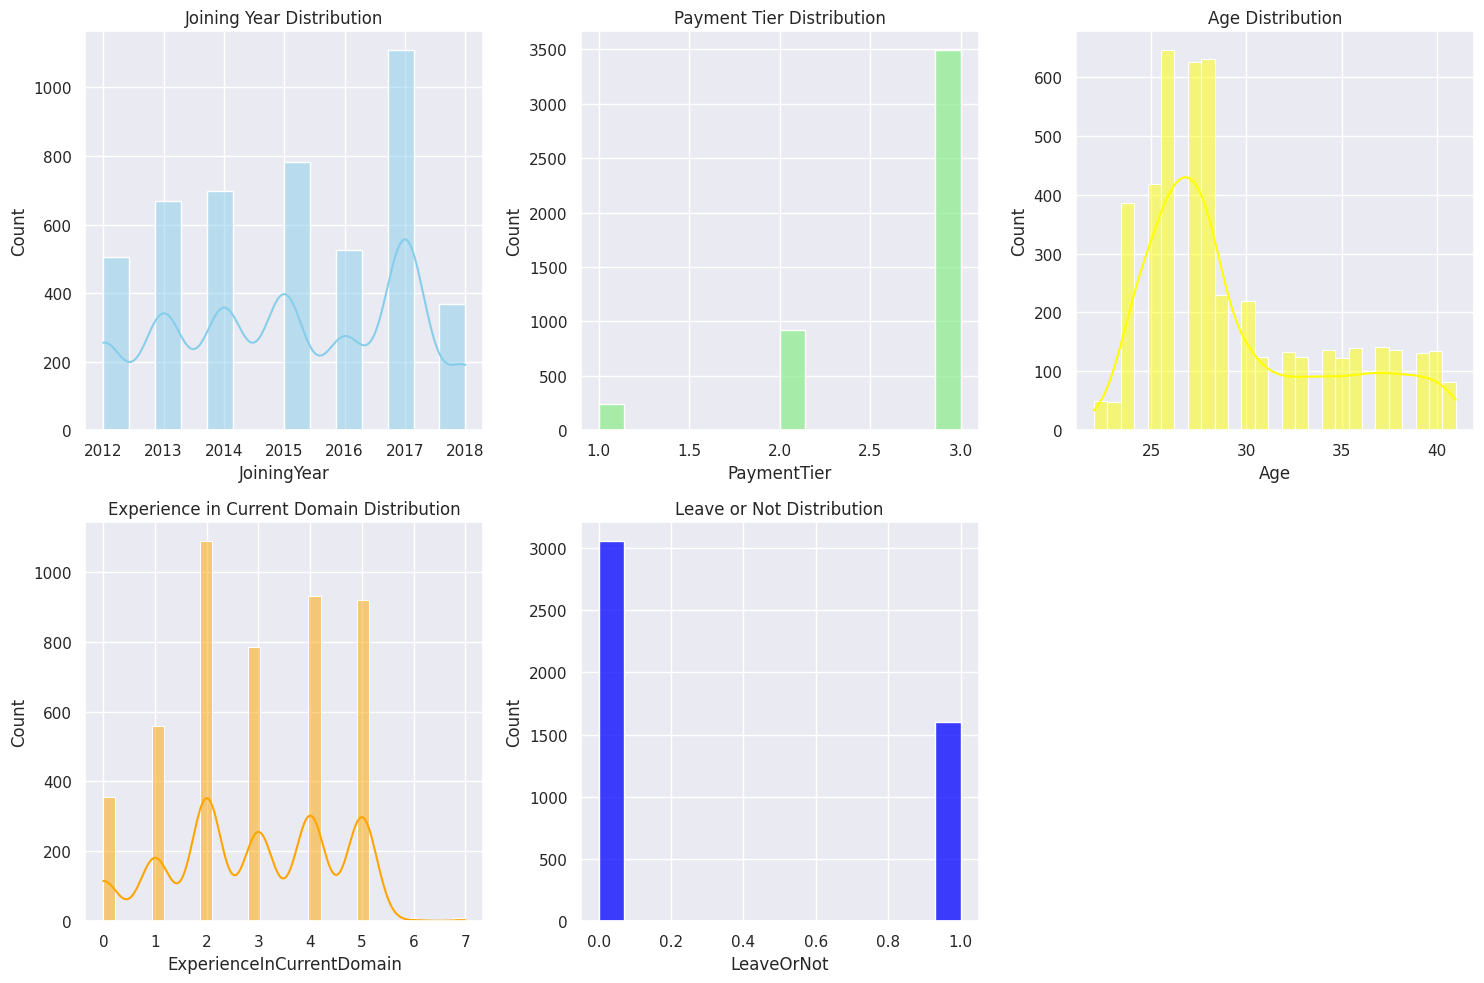

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

#distributions for numerical attributes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.histplot(df['JoiningYear'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Joining Year Distribution')
sns.histplot(df['PaymentTier'], kde=False, ax=axes[0, 1], color='lightgreen').set_title('Payment Tier Distribution')
sns.histplot(df['Age'], kde=True, ax=axes[0, 2], color='yellow').set_title('Age Distribution')
sns.histplot(df['ExperienceInCurrentDomain'], kde=True, ax=axes[1, 0], color='orange').set_title('Experience in Current Domain Distribution')
sns.histplot(df['LeaveOrNot'], kde=False, ax=axes[1, 1], color='blue').set_title('Leave or Not Distribution')

axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()



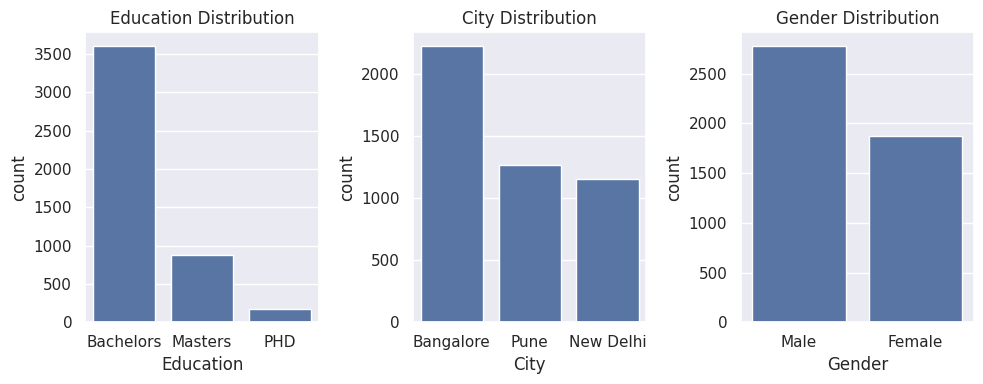

In [125]:
#distributions for categorical attributes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
sns.countplot(x='Education', data=df, ax=axes[0]).set_title('Education Distribution')
sns.countplot(x='City', data=df, ax=axes[1]).set_title('City Distribution')
sns.countplot(x='Gender', data=df, ax=axes[2]).set_title('Gender Distribution')


plt.tight_layout()
plt.show()

From the dataset, we can infer that it contains 4653 rows and 9 columns out of which, 5 columns are numerical attributes and 4 of them are categorical attributes. The LeaveOrNot column is our label. We need to encode all the categorical columns 'Education', 'City', 'Gender', 'EverBenched' before training our models on them. These are the columns which are of 'object' datatype.
Futher, we observe that there are no missing values in the dataset and hence no special treatment is required here. We also observe that the data is standardised which means that we do not need to perform any kind of standardisation.


# 2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]

array([[<Axes: xlabel='JoiningYear', ylabel='JoiningYear'>,
        <Axes: xlabel='PaymentTier', ylabel='JoiningYear'>,
        <Axes: xlabel='Age', ylabel='JoiningYear'>,
        <Axes: xlabel='ExperienceInCurrentDomain', ylabel='JoiningYear'>,
        <Axes: xlabel='LeaveOrNot', ylabel='JoiningYear'>],
       [<Axes: xlabel='JoiningYear', ylabel='PaymentTier'>,
        <Axes: xlabel='PaymentTier', ylabel='PaymentTier'>,
        <Axes: xlabel='Age', ylabel='PaymentTier'>,
        <Axes: xlabel='ExperienceInCurrentDomain', ylabel='PaymentTier'>,
        <Axes: xlabel='LeaveOrNot', ylabel='PaymentTier'>],
       [<Axes: xlabel='JoiningYear', ylabel='Age'>,
        <Axes: xlabel='PaymentTier', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='ExperienceInCurrentDomain', ylabel='Age'>,
        <Axes: xlabel='LeaveOrNot', ylabel='Age'>],
       [<Axes: xlabel='JoiningYear', ylabel='ExperienceInCurrentDomain'>,
        <Axes: xlabel='PaymentTier', ylabel='Exp

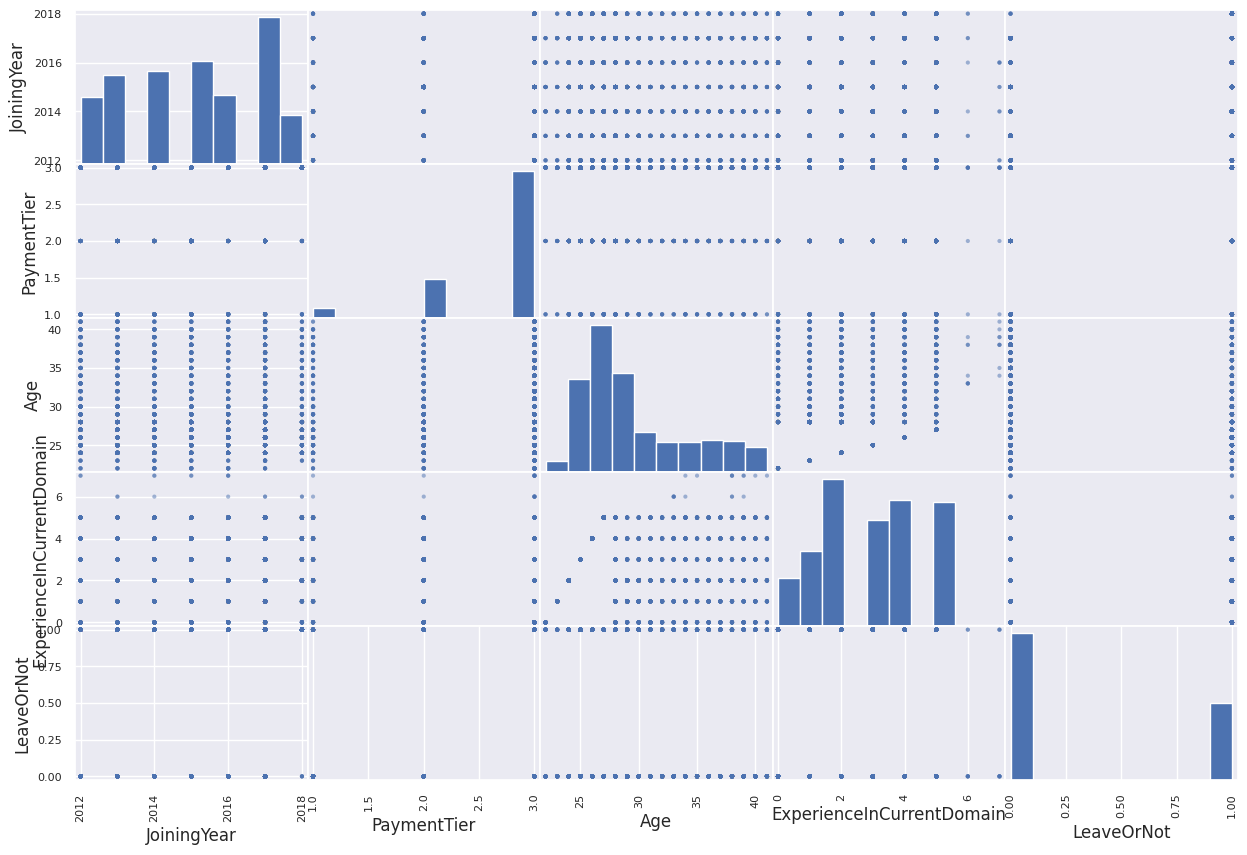

In [126]:
attributes = ["JoiningYear", "PaymentTier", "Age", "ExperienceInCurrentDomain", "LeaveOrNot"]
pd.plotting.scatter_matrix(df[attributes], figsize=(15, 10))

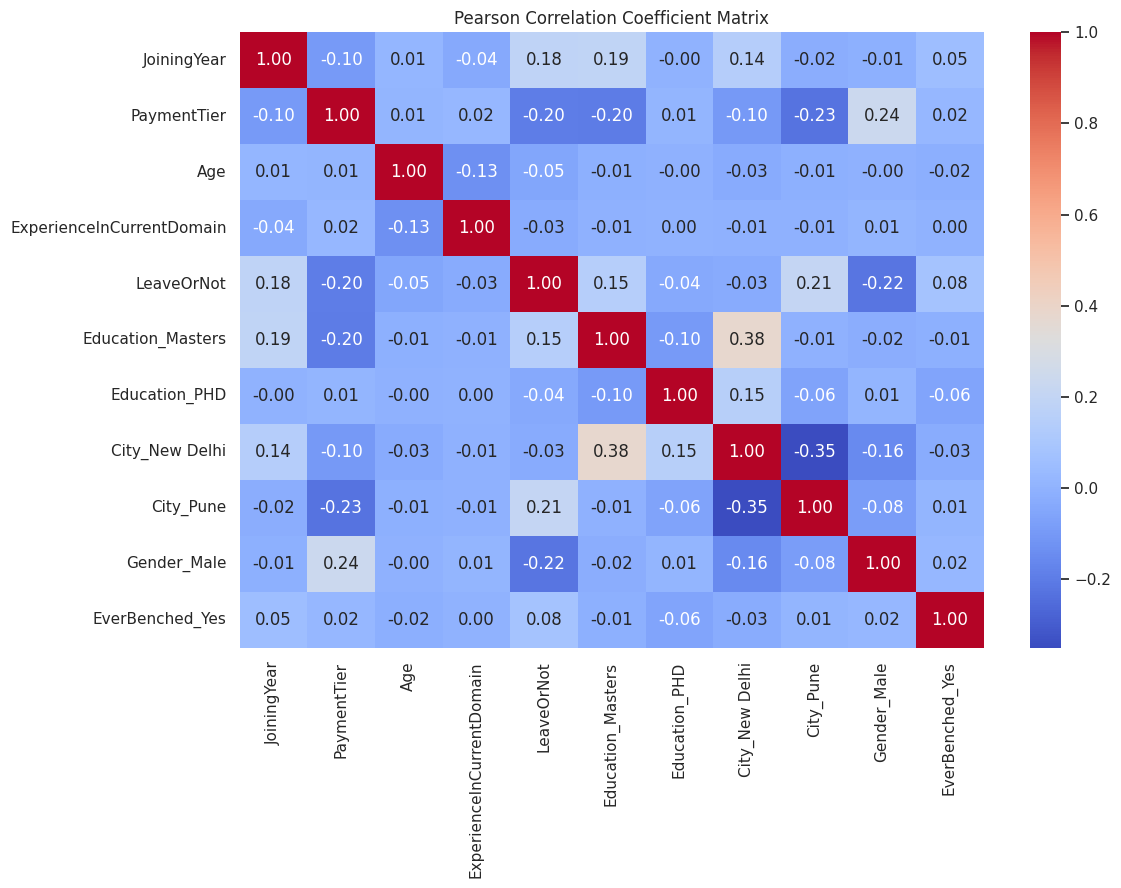

LeaveOrNot                   1.000000
City_Pune                    0.206264
JoiningYear                  0.181705
Education_Masters            0.145801
EverBenched_Yes              0.078438
ExperienceInCurrentDomain   -0.030504
City_New Delhi              -0.033341
Education_PHD               -0.038938
Age                         -0.051126
PaymentTier                 -0.197638
Gender_Male                 -0.220701
Name: LeaveOrNot, dtype: float64

In [127]:
#Converting categorical variables to numerical for correlation analysis
df_numeric = pd.get_dummies(df, drop_first=True)

#Pearson Correlation Coefficient (PCC)
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

correlation_matrix['LeaveOrNot'].sort_values(ascending=False)


The Pearson Correlation Coefficient (PCC) matrix reveals different relationships between data attributes. We can infer that values very close to +1 are positively correlated and the values that are close to -1 are negatively correlated. City_Pune and JoiningYear show positive correlations with LeaveOrNot leaving the company, suggesting employees in Pune or those who joined more recently are slightly more likely to leave. Education_Masters also shows a positive correlation, indicating employees with a master's degree are somewhat more likely to leave compared to those with other educational qualifications.
PaymentTier and Gender_Male have negative correlations with leaving, suggesting that higher payment tiers and being male are associated with a lower likelihood of leaving the company. Age and ExperienceInCurrentDomain show slight negative correlations, implying that older employees and those with more experience in their current domain are slightly less likely to leave.

In [128]:
corr_matrix = df.corr()
corr_matrix['LeaveOrNot'].sort_values(ascending=False)

LeaveOrNot                   1.000000
JoiningYear                  0.181705
ExperienceInCurrentDomain   -0.030504
Age                         -0.051126
PaymentTier                 -0.197638
Name: LeaveOrNot, dtype: float64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [130]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [131]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

categorical_var = ['Education', 'City', 'Gender', 'EverBenched']
numerical_var = list(df.drop(['Education', 'City', 'Gender', 'EverBenched', 'LeaveOrNot'], axis=1))
label= ['LeaveOrNot']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_var),
    ('cat', OneHotEncoder(), categorical_var),
])

In [132]:
categorical_var

['Education', 'City', 'Gender', 'EverBenched']

In [133]:
numerical_var

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

In [134]:
label

['LeaveOrNot']

In [135]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Education']=le.fit_transform(df['Education'])
df['City']=le.fit_transform(df.City)
df['Gender']=le.fit_transform(df['Gender'])
df['EverBenched']=le.fit_transform(df['EverBenched'])

In [137]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


# 3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset.

In [138]:
from sklearn.model_selection import train_test_split

#splitting the dataset into 60% training and 40% temporary holdout set(to be split again into validation and test)
train_df, temp_df = train_test_split(df_numeric, test_size=0.4, random_state=42)

#splitting the temporary holdout dataset into validation and test sets (50% each of holdout, resulting in 20% of the original each)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#verifying the splits by checking the size of each dataset
total_rows = df_numeric.shape[0]
train_rows = train_df.shape[0]
val_rows = val_df.shape[0]
test_rows = test_df.shape[0]

#checking representation by comparing means of the training, validation, and test datasets
train_mean = train_df.mean()
val_mean = val_df.mean()
test_mean = test_df.mean()

split_sizes = (train_rows, val_rows, test_rows, total_rows)
mean_comparison = pd.DataFrame({'Train Mean': train_mean, 'Validation Mean': val_mean, 'Test Mean': test_mean})

split_sizes, mean_comparison


((2791, 931, 931, 4653),
                             Train Mean  Validation Mean    Test Mean
 JoiningYear                2015.095306      2015.031149  2014.997852
 PaymentTier                   2.694016         2.705693     2.703545
 Age                          29.425654        29.646617    29.042965
 ExperienceInCurrentDomain     2.914009         2.876477     2.909774
 LeaveOrNot                    0.345038         0.342642     0.341568
 Education_Masters             0.193121         0.176155     0.182599
 Education_PHD                 0.038338         0.042965     0.034372
 City_New Delhi                0.254389         0.250269     0.229860
 City_Pune                     0.267646         0.283566     0.276047
 Gender_Male                   0.599427         0.612245     0.574651
 EverBenched_Yes               0.095306         0.119227     0.108485)

In [139]:
train_df

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
4219,2017,2,34,4,0,1,0,1,0,0,0
3616,2015,3,38,1,0,1,0,1,0,1,0
679,2017,1,26,4,0,0,0,0,0,0,0
4074,2017,3,36,1,0,0,0,0,0,0,0
3927,2017,3,41,3,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4426,2014,3,32,1,0,0,0,0,0,1,0
466,2013,3,26,4,0,0,0,0,0,1,1
3092,2016,3,39,1,0,0,0,0,0,0,0
3772,2015,3,41,1,0,0,0,0,0,1,0


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

#training
X_train = train_df.drop('LeaveOrNot', axis=1)
y_train = train_df['LeaveOrNot']

#validation
X_val = val_df.drop('LeaveOrNot', axis=1)
y_val = val_df['LeaveOrNot']

#testing
X_test = test_df.drop('LeaveOrNot', axis=1)
y_test = test_df['LeaveOrNot']

results = {}



In [141]:
train_df.shape

(2791, 11)

In [142]:
test_df.shape

(931, 11)

In [143]:
val_df.shape

(931, 11)

array([[<Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>,
        <Axes: title={'center': 'Education_Masters'}>],
       [<Axes: title={'center': 'Education_PHD'}>,
        <Axes: title={'center': 'City_New Delhi'}>,
        <Axes: title={'center': 'City_Pune'}>],
       [<Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'EverBenched_Yes'}>, <Axes: >]],
      dtype=object)

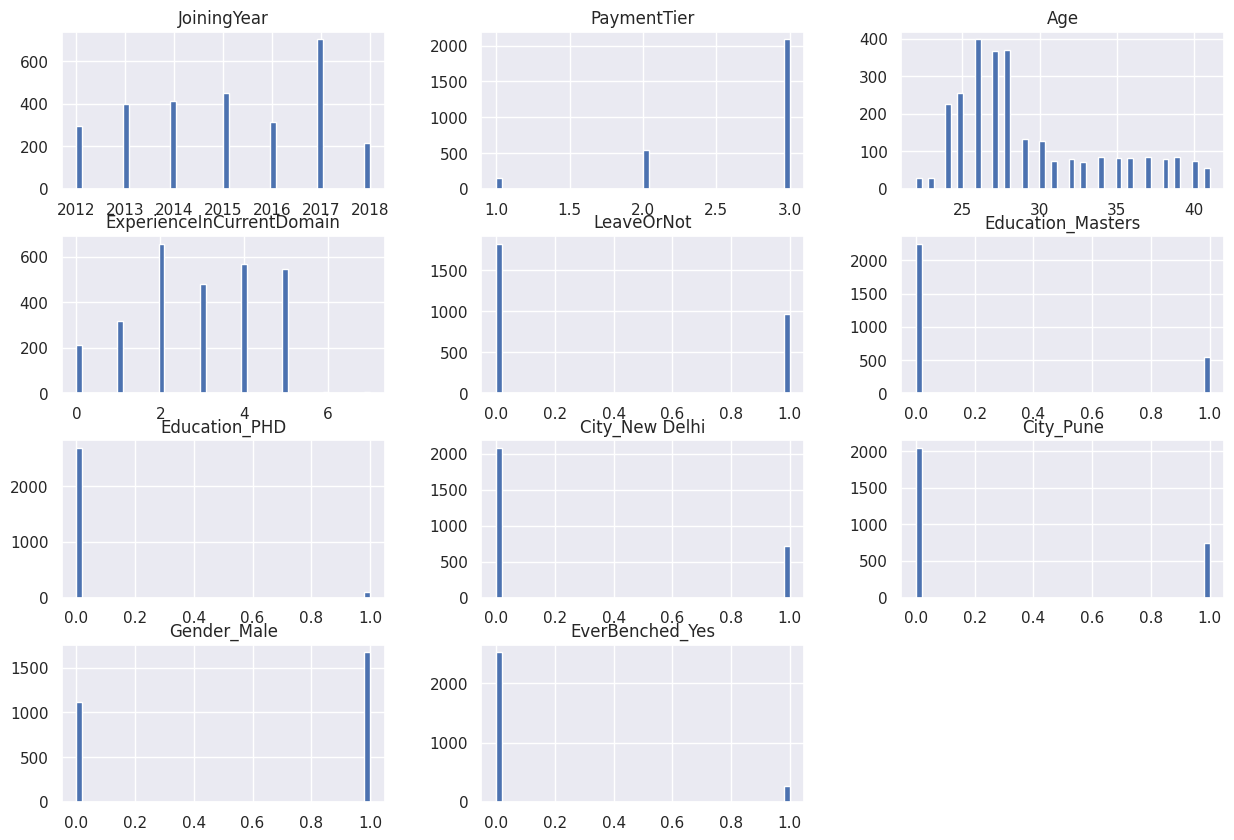

In [144]:
#checking the data distribution of the validation set
train_df.hist(bins=50, figsize=(15,10))

array([[<Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>,
        <Axes: title={'center': 'Education_Masters'}>],
       [<Axes: title={'center': 'Education_PHD'}>,
        <Axes: title={'center': 'City_New Delhi'}>,
        <Axes: title={'center': 'City_Pune'}>],
       [<Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'EverBenched_Yes'}>, <Axes: >]],
      dtype=object)

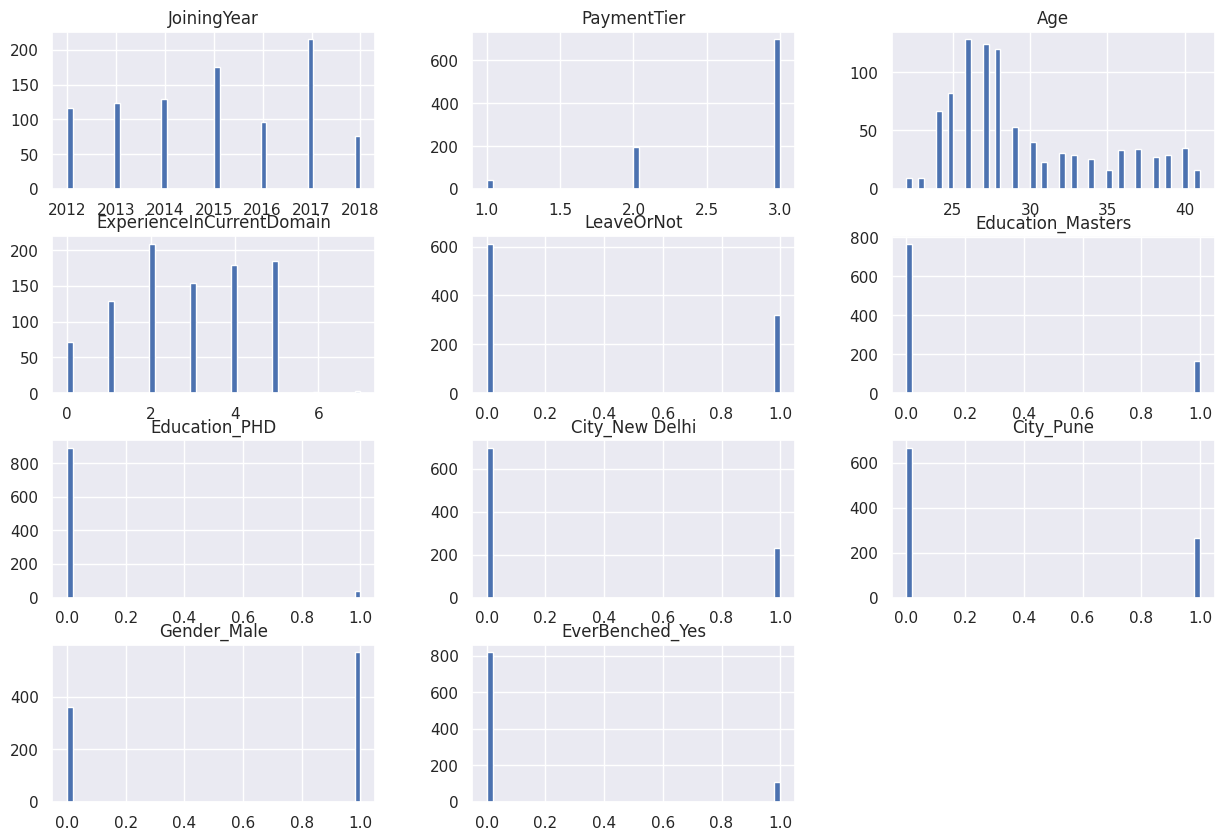

In [145]:
#checking the data distribution of the validation set
val_df.hist(bins=50, figsize=(15,10))

array([[<Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>,
        <Axes: title={'center': 'Education_Masters'}>],
       [<Axes: title={'center': 'Education_PHD'}>,
        <Axes: title={'center': 'City_New Delhi'}>,
        <Axes: title={'center': 'City_Pune'}>],
       [<Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'EverBenched_Yes'}>, <Axes: >]],
      dtype=object)

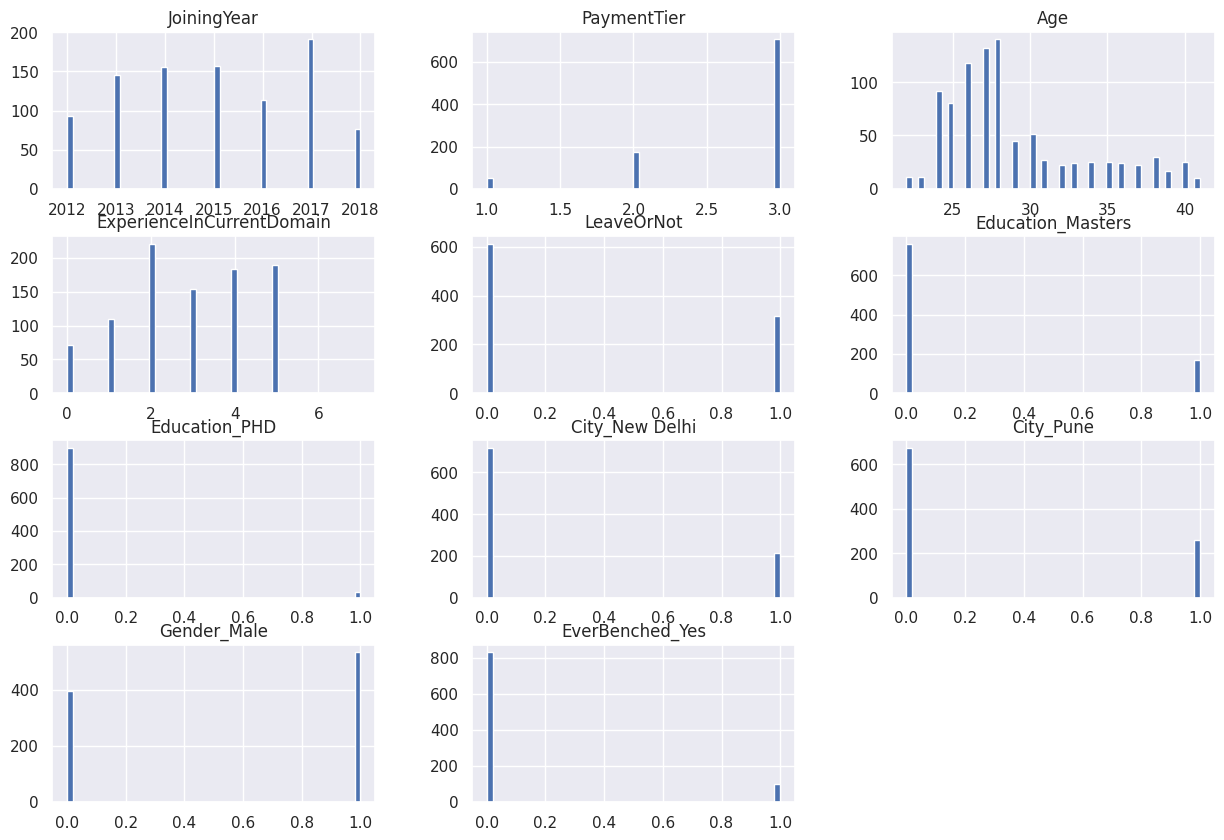

In [146]:
#checking the data distribution of the validation set
test_df.hist(bins=50, figsize=(15,10))

In [147]:
train_df.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
4219,2017,2,34,4,0,1,0,1,0,0,0
3616,2015,3,38,1,0,1,0,1,0,1,0
679,2017,1,26,4,0,0,0,0,0,0,0
4074,2017,3,36,1,0,0,0,0,0,0,0
3927,2017,3,41,3,1,1,0,1,0,1,0


In [148]:
X_train

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
4219,2017,2,34,4,1,0,1,0,0,0
3616,2015,3,38,1,1,0,1,0,1,0
679,2017,1,26,4,0,0,0,0,0,0
4074,2017,3,36,1,0,0,0,0,0,0
3927,2017,3,41,3,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4426,2014,3,32,1,0,0,0,0,1,0
466,2013,3,26,4,0,0,0,0,1,1
3092,2016,3,39,1,0,0,0,0,0,0
3772,2015,3,41,1,0,0,0,0,1,0


In [149]:
y_train

4219    0
3616    0
679     0
4074    0
3927    1
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: LeaveOrNot, Length: 2791, dtype: int64

The dataset has been divided into training, validation, and test sets using a stratified sampling approach to ensure each subset is representative of the whole dataset. First, the dataset was split into two parts: 60% for training and 40% into a temporary holdout set. This temporary holdout set was further split equally into validation and test sets, each constituting 20% of the original dataset.
To verify that the validation and test sets are representative of the entire dataset, after performing the split, I have compared the distribution (mean values) of features across the training, validation, and test sets.

Split Sizes:
Training Set: 2791 entries (60% of the dataset)
Validation Set: 931 entries (20% of the dataset)
Test Set: 931 entries (20% of the dataset)
Total Entries: 4653

The mean values of key attributes across the training, validation, and test datasets are closely aligned, indicating that the splits are indeed representative of the entire dataset. Additionally, the histograms give us an idea about the train, validation and test datasets distribution.

# Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution): 1. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points] 2. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points] 3. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]


**Multinomial Logistic Regression**

Regularization Strength (C): In logistic regression C plays a crucial role in controlling the trade-off between smooth decision boundaries and classifying the training points correctly. A lower value of C increases regularization, which can help reduce overfitting.
Solver Type: For logistic regression, the choice of solver can impact the convergence speed and accuracy, especially for large datasets or datasets with a high number of features.

In [150]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y, df_name):
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"Evaluation for {df_name}:")
    print(f"Accuracy: {accuracy:}")
    print(f"Precision: {precision:}")
    print(f"Recall: {recall:}")
    print(f"F1 Score: {f1:}")
    print("")

In [151]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

lr = LogisticRegression(multi_class='multinomial', random_state=42)

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_

best_lr = LogisticRegression(multi_class='multinomial', random_state=42, **best_params_lr)
best_lr.fit(X_train, y_train)


evaluate_model(best_lr, X_train, y_train, 'Training Set')
evaluate_model(best_lr, X_val, y_val, 'Validation Set')
evaluate_model(best_lr, X_test, y_test, 'Testing Set')

Evaluation for Training Set:
Accuracy: 0.7388032963095664
Precision: 0.7331853175795386
Recall: 0.7388032963095664
F1 Score: 0.7175288744961386

Evaluation for Validation Set:
Accuracy: 0.7228786251342643
Precision: 0.7121031732628109
Recall: 0.7228786251342643
F1 Score: 0.7007236448427587

Evaluation for Testing Set:
Accuracy: 0.7411385606874329
Precision: 0.7325441621465616
Recall: 0.7411385606874329
F1 Score: 0.7249360116798098



In [152]:
best_params_lr

{'C': 1.0, 'solver': 'lbfgs'}

**SUPPORT VECTOR MACHINE**

Regularization Strength (C): In SVM, C plays a crucial role in controlling the trade-off between smooth decision boundaries and classifying the training points correctly. A lower value of C increases regularization, which can help reduce overfitting.
Kernel Type and Parameters: In SVMs, the choice of kernel and its parameters (such as degree and gamma) significantly influences the model's ability to capture complex relationships in the data. Different kernels can model different types of data distributions.

In [153]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'rbf'],
         'degree': [2, 3],
         'gamma': ['scale', 'auto'],
         'C': [0.01, 0.1]}

grid_search_svc = GridSearchCV(SVC(probability=True), param_grid,cv = 5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search_svc.best_params_

best_svc = SVC(random_state=42, **best_params_svc)
best_svc.fit(X_train, y_train)


evaluate_model(best_svc, X_train, y_train, 'Training Set')
evaluate_model(best_svc, X_val, y_val, 'Validation Set')
evaluate_model(best_svc, X_test, y_test, 'Testing Set')


Evaluation for Training Set:
Accuracy: 0.7309208169115012
Precision: 0.7221702170842558
Recall: 0.7309208169115012
F1 Score: 0.7112165420082032

Evaluation for Validation Set:
Accuracy: 0.723952738990333
Precision: 0.7128288140607478
Recall: 0.723952738990333
F1 Score: 0.7040663318616763

Evaluation for Testing Set:
Accuracy: 0.7346938775510204
Precision: 0.7253856521140454
Recall: 0.7346938775510204
F1 Score: 0.7163459515656706



In [154]:
best_params_svc

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

**RANDOM FOREST CLASSIFIER**

Number of Trees and Tree Depth: Increasing the number of trees improves model performance but also increases computational load. Tree depth controls the complexity of the models captured by each tree, where deeper trees can model more complex relationships but also risk overfitting.

In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200], # The number of trees in the forest.
    'max_depth': [10, 20, 30], # The maximum depth of the tree.
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4] # The minimum number of samples required to be at a leaf node.
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=7, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf.fit(X_train, y_train)


evaluate_model(best_rf, X_train, y_train, 'Training Set')
evaluate_model(best_rf, X_val, y_val, 'Validation Set')
evaluate_model(best_rf, X_test, y_test, 'Testing Set')

Evaluation for Training Set:
Accuracy: 0.8781798638480831
Precision: 0.8839304559062497
Recall: 0.8781798638480831
F1 Score: 0.8733674954490657

Evaluation for Validation Set:
Accuracy: 0.8657357679914071
Precision: 0.8701294597357566
Recall: 0.8657357679914071
F1 Score: 0.8603185770995083

Evaluation for Testing Set:
Accuracy: 0.8517722878625135
Precision: 0.8539925620749464
Recall: 0.8517722878625135
F1 Score: 0.8460401332495162



In [156]:
best_params_rf

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}




I have trained 3 classifiers which also involved tuning hyperparameters for them: Multinomial Logistic Regression, Support Vector Machines (SVM), and Random Forest Classifier.

Multinomial Logistic Regression:

GridSearchCV was helpful in finding out the best combination of hyperparameters that would give the most accurate results.
Hyperparameters explored are Regularization strength (C), solver type (solver), and maximum number of iterations (max_iter).
The model's performance was evaluated based on classification accuracy, precision, recall, and F1 score across training, validation, and testing datasets.
The hyperparameters that resulted in the best accuracy of around 73.8% are {'C': 1.0, 'solver': 'lbfgs'}


Support Vector Machines (SVM):

Performed GridSearchCV to determine the best combination of hyperparameters. Hyperparameters explored are Regularization parameter (C), kernel type (kernel), degree of the polynomial kernel (degree), and kernel coefficient (gamma).
The model's performance was evaluated based on classification accuracy, precision, recall, and F1 score across training, validation, and testing datasets.
The hyperparameters that resulted in the best accuracy of around 73% are {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


Random Forest Classifier:

Performed GridSearchCV to determine the best combination of hyperparameters. Hyperparameters explored are Number of trees (n_estimators), maximum depth of the trees (max_depth), minimum number of samples required to split an internal node (min_samples_split), and the minimum number of samples required to be at a leaf node (min_samples_leaf).
The model's performance was evaluated based on classification accuracy, precision, recall, and F1 score across training, validation, and testing datasets.
The hyperparameters that resulted in the best accuracy of around 87.8% are {'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}


It can thus be concluded that Random Forest Classifier is the best model for this dataset.

# Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]


The idea behind using an ensemble method, like the Voting Classifier, is to combine the predictions of multiple classifiers to improve the overall performance. The hypothesis is that an ensemble can achieve better accuracy, precision, recall, and F1 scores than any individual classifier by leveraging their collective strengths and mitigating individual weaknesses. Here, the ensemble model is using a Soft voting approach as it aggregates the predictions of various models by averaging their probability estimates for each class, rather than relying on the most frequent class label. This approach can lead to more nuanced decisions, especially when models are uncertain, as it considers the confidence of each model in its prediction. This method often improves performance over hard voting by leveraging the predictive power of each classifier's estimated probabilities.









In [157]:
from sklearn.ensemble import VotingClassifier


#best models from previous tuning
log_reg_best = grid_search_lr.best_estimator_
svm_best = grid_search_svc.best_estimator_
rf_best = grid_search_rf.best_estimator_

#create an ensemble model using Soft Voting Classifier
ensemble_clf = VotingClassifier(estimators=[
    ('logreg', log_reg_best),
    ('svm', svm_best),
    ('rf', rf_best)],
    voting='soft')

#train the ensemble model
ensemble_clf.fit(X_train, y_train)

#evaluate the ensemble model on validation and test sets
y_pred_validation_ensemble = ensemble_clf.predict(X_val)
y_pred_test_ensemble = ensemble_clf.predict(X_test)


In [158]:
#performance metrics for validation set
validation_accuracy_ensemble = accuracy_score(y_val, y_pred_validation_ensemble)
validation_precision_ensemble, validation_recall_ensemble, validation_f1_ensemble, _ = precision_recall_fscore_support(y_val, y_pred_validation_ensemble, average='binary')
val_report = classification_report(y_val, y_pred_validation_ensemble)
en_val_cm = confusion_matrix(y_val, y_pred_validation_ensemble)

print(f'Validation Accuracy: {validation_accuracy_ensemble*100:.2f}%')
print(f'Ensemble Model Classification Report For Validation set:\n {val_report}')
print(f'Ensemble Model Confusion Matrix For Validation set:\n {en_val_cm}')

print("\n")

print("Performance metrics\n")

ensemble_results_validation = {
    'Validation results':"",
    'Accuracy': validation_accuracy_ensemble,
    'Precision': validation_precision_ensemble,
    'Recall': validation_recall_ensemble,
    'F1 Score': validation_f1_ensemble
}


ensemble_results_validation

Validation Accuracy: 78.52%
Ensemble Model Classification Report For Validation set:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       612
           1       0.78      0.52      0.62       319

    accuracy                           0.79       931
   macro avg       0.78      0.72      0.74       931
weighted avg       0.78      0.79      0.77       931

Ensemble Model Confusion Matrix For Validation set:
 [[565  47]
 [153 166]]


Performance metrics



{'Validation results': '',
 'Accuracy': 0.7851772287862513,
 'Precision': 0.7793427230046949,
 'Recall': 0.5203761755485894,
 'F1 Score': 0.62406015037594}

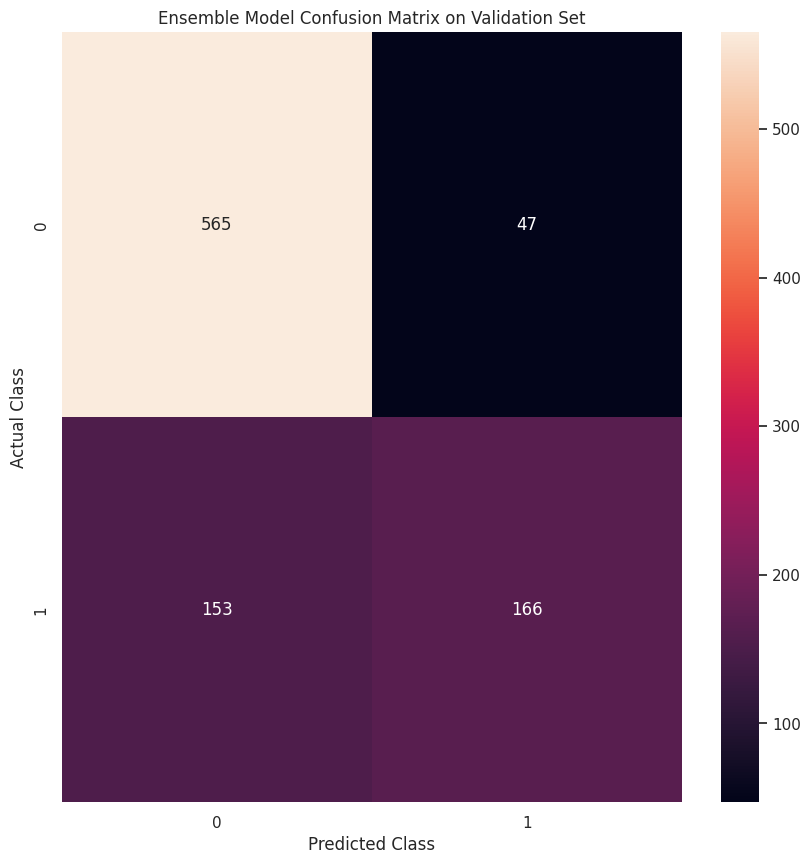

In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(en_val_cm, annot=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Ensemble Model Confusion Matrix on Validation Set')
plt.show()

In [160]:
#performance metrics for test set
test_accuracy_ensemble = accuracy_score(y_test, y_pred_test_ensemble)
test_precision_ensemble, test_recall_ensemble, test_f1_ensemble, _ = precision_recall_fscore_support(y_test, y_pred_test_ensemble, average='binary')

accuracy = accuracy_score(y_test, y_pred_test_ensemble)
test_report = classification_report(y_test, y_pred_test_ensemble)
en_test_cm = confusion_matrix(y_test, y_pred_test_ensemble)

print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Ensemble Model Classification Report For Test set:\n {test_report}')
print(f'Ensemble Model Confusion Matrix For Test set:\n {en_test_cm}')
print("\n")
ensemble_results_test = {
    'Test results': "",
    'Accuracy': test_accuracy_ensemble,
    'Precision': test_precision_ensemble,
    'Recall': test_recall_ensemble,
    'F1 Score': test_f1_ensemble
}

ensemble_results_test

Test Accuracy: 80.34%
Ensemble Model Classification Report For Test set:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       613
           1       0.79      0.58      0.67       318

    accuracy                           0.80       931
   macro avg       0.80      0.75      0.76       931
weighted avg       0.80      0.80      0.79       931

Ensemble Model Confusion Matrix For Test set:
 [[565  48]
 [135 183]]




{'Test results': '',
 'Accuracy': 0.80343716433942,
 'Precision': 0.7922077922077922,
 'Recall': 0.5754716981132075,
 'F1 Score': 0.6666666666666667}

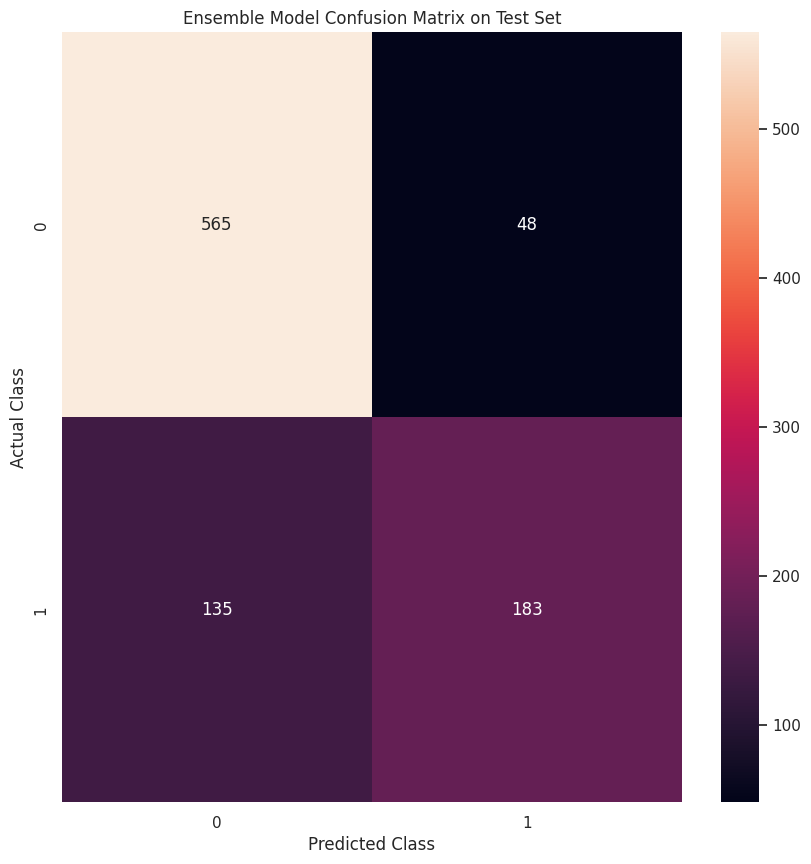

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(en_test_cm, annot=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Ensemble Model Confusion Matrix on Test Set')
plt.show()

The Ensemble classifier is using the pre trained classifiers which are Multinomial Logistic Regression, Support Vector Classifier & Random Forest. These classifiers have undergone hyperparameter tuning ans optimization processes and therefore, the best fit models are being used for the ensemble model.

This Ensemble model employs a soft voting strategy, to generate the final prediction which resulted in 78.5 % accuracy for Validation set and 80.3% for Test Set.

